In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import load
from torch import FloatTensor
from machine_learning.DNN.model import DNN
from machine_learning.DNN.training import train_model
from machine_learning.DNN.data_pipepline import CarData
from torch.utils.data import DataLoader

c:\Users\~MatthijsvanGroening\.conda\envs\sdp_cars\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = './data'

# data params
label_col = 'price'
norm_feats = ['year', 'odometer', 'cylinders', 'lat', 'long']
label_norm = 'standard'

# training params
batch_size = 32
val_size = 0.1
test_size = 0.1

# data files
train_features_file = os.path.join(data_dir, 'cleaned_data_train.parquet')
train_label_file = os.path.join(data_dir, 'cleaned_price_train.parquet')
val_features_file = os.path.join(data_dir, 'cleaned_data_val.parquet')
val_label_file = os.path.join(data_dir, 'cleaned_price_val.parquet')
test_features_file = os.path.join(data_dir, 'cleaned_data_test.parquet')
test_label_file = os.path.join(data_dir, 'cleaned_price_test.parquet')

data = CarData()
data.load_from_files(train_features_file, train_label_file, val_features_file, 
                     val_label_file,  test_features_file, test_label_file,
                     norm_feats, label_norm='standard')

train_data = DataLoader(data.train_data, batch_size=batch_size, shuffle=True)
val_data = DataLoader(data.val_data, batch_size=batch_size, shuffle=True)

In [3]:
# model params
input_dim = len(data.train_data.dataset[0][0])
hidden_dims = [512, 256, 256, 128]
output_dim = 1

# training params
learning_rate = 0.001
n_epochs = 100
l2_reg = 1e-5

model_save_dir = f"./machine_learning/DNN/models/arc_{'_'.join([str(i) for i in hidden_dims])}_lr_{learning_rate}_l2_{l2_reg}"

In [4]:
model = DNN(hidden_dims=hidden_dims, input_dim=input_dim, output_dim=output_dim)
losses = train_model(model=model, model_save_dir=model_save_dir, 
            train_dataset=train_data, val_dataset=val_data,
            lr=learning_rate, num_epochs=n_epochs, l2=l2_reg)

val epoch 0: 100%|██████████| 1107/1107 [00:03<00:00, 335.05it/s, rmse=0.402]


val epoch 1: 100%|██████████| 1107/1107 [00:03<00:00, 327.23it/s, rmse=0.381]


val epoch 2: 100%|██████████| 1107/1107 [00:03<00:00, 337.10it/s, rmse=0.375]


val epoch 3: 100%|██████████| 1107/1107 [00:03<00:00, 351.04it/s, rmse=0.375]


val epoch 4: 100%|██████████| 1107/1107 [00:03<00:00, 342.19it/s, rmse=0.359]


val epoch 5: 100%|██████████| 1107/1107 [00:03<00:00, 356.67it/s, rmse=0.36]


val epoch 6: 100%|██████████| 1107/1107 [00:03<00:00, 338.34it/s, rmse=0.362]


val epoch 7: 100%|██████████| 1107/1107 [00:02<00:00, 371.79it/s, rmse=0.363]


val epoch 8: 100%|██████████| 1107/1107 [00:03<00:00, 329.62it/s, rmse=0.351]


val epoch 9: 100%|██████████| 1107/1107 [00:03<00:00, 346.95it/s, rmse=0.343]


val epoch 10: 100%|██████████| 1107/1107 [00:03<00:00, 352.31it/s, rmse=0.35]


val epoch 11: 100%|██████████| 1107/1107 [00:03<00:00, 347.70it/s, rmse=0.348]


val epoch 12: 100%|██████████| 1107/1107 [00:02<00:00, 373.59it/s, rmse=0.342]


val epoch 13: 100%|██████████| 1107/1107 [00:02<00:00, 371.69it/s, rmse=0.349]


val epoch 14: 100%|██████████| 1107/1107 [00:03<00:00, 339.22it/s, rmse=0.339]


val epoch 15: 100%|██████████| 1107/1107 [00:02<00:00, 372.33it/s, rmse=0.353]


val epoch 16: 100%|██████████| 1107/1107 [00:03<00:00, 284.32it/s, rmse=0.342]


val epoch 17: 100%|██████████| 1107/1107 [00:03<00:00, 334.37it/s, rmse=0.344]


val epoch 18: 100%|██████████| 1107/1107 [00:02<00:00, 372.69it/s, rmse=0.339]


val epoch 19: 100%|██████████| 1107/1107 [00:02<00:00, 378.37it/s, rmse=0.339]


val epoch 20: 100%|██████████| 1107/1107 [00:03<00:00, 368.67it/s, rmse=0.335]


val epoch 21: 100%|██████████| 1107/1107 [00:03<00:00, 334.61it/s, rmse=0.342]


val epoch 22: 100%|██████████| 1107/1107 [00:03<00:00, 365.47it/s, rmse=0.333]


val epoch 23: 100%|██████████| 1107/1107 [00:02<00:00, 391.01it/s, rmse=0.334]


val epoch 24: 100%|██████████| 1107/1107 [00:03<00:00, 363.15it/s, rmse=0.337]


val epoch 25: 100%|██████████| 1107/1107 [00:03<00:00, 356.36it/s, rmse=0.338]


val epoch 26: 100%|██████████| 1107/1107 [00:02<00:00, 377.55it/s, rmse=0.333]


val epoch 27: 100%|██████████| 1107/1107 [00:02<00:00, 372.48it/s, rmse=0.333]


val epoch 28: 100%|██████████| 1107/1107 [00:02<00:00, 369.55it/s, rmse=0.337]


val epoch 29: 100%|██████████| 1107/1107 [00:02<00:00, 375.74it/s, rmse=0.332]


val epoch 30: 100%|██████████| 1107/1107 [00:03<00:00, 347.31it/s, rmse=0.339]


val epoch 31: 100%|██████████| 1107/1107 [00:02<00:00, 372.84it/s, rmse=0.332]


val epoch 32: 100%|██████████| 1107/1107 [00:02<00:00, 381.23it/s, rmse=0.335]


val epoch 33: 100%|██████████| 1107/1107 [00:02<00:00, 372.55it/s, rmse=0.334]


val epoch 34: 100%|██████████| 1107/1107 [00:02<00:00, 372.25it/s, rmse=0.339]


val epoch 35: 100%|██████████| 1107/1107 [00:02<00:00, 415.29it/s, rmse=0.332]


val epoch 36: 100%|██████████| 1107/1107 [00:03<00:00, 367.18it/s, rmse=0.33]


val epoch 37: 100%|██████████| 1107/1107 [00:03<00:00, 289.41it/s, rmse=0.334]


val epoch 38: 100%|██████████| 1107/1107 [00:02<00:00, 371.54it/s, rmse=0.326]


val epoch 39: 100%|██████████| 1107/1107 [00:02<00:00, 371.29it/s, rmse=0.336]


val epoch 40: 100%|██████████| 1107/1107 [00:03<00:00, 360.22it/s, rmse=0.333]


val epoch 41: 100%|██████████| 1107/1107 [00:05<00:00, 186.46it/s, rmse=0.339]


val epoch 42: 100%|██████████| 1107/1107 [00:02<00:00, 369.08it/s, rmse=0.33]


val epoch 43: 100%|██████████| 1107/1107 [00:03<00:00, 352.75it/s, rmse=0.339]


val epoch 44: 100%|██████████| 1107/1107 [00:03<00:00, 343.55it/s, rmse=0.336]


val epoch 45: 100%|██████████| 1107/1107 [00:03<00:00, 350.17it/s, rmse=0.332]


val epoch 46: 100%|██████████| 1107/1107 [00:03<00:00, 358.57it/s, rmse=0.333]


val epoch 47: 100%|██████████| 1107/1107 [00:03<00:00, 361.80it/s, rmse=0.336]


val epoch 48: 100%|██████████| 1107/1107 [00:02<00:00, 370.12it/s, rmse=0.327]


 
Early stopping after 48 epochs


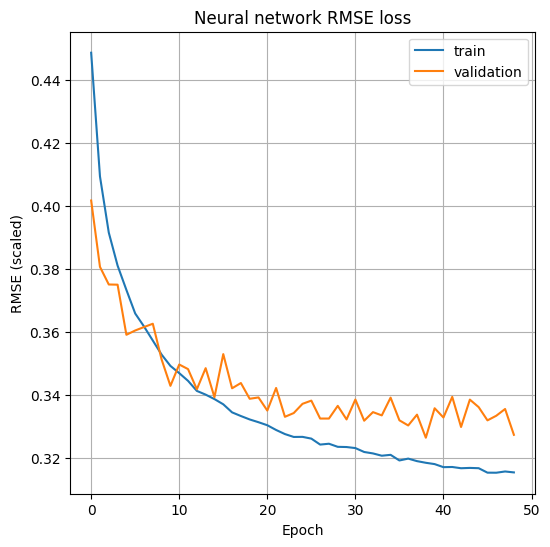

In [7]:
epochs = np.arange(len(losses['train']))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(epochs, losses['train'], label='train')
ax.plot(epochs, losses['val'], label='validation')
ax.set_xlabel('Epoch')
ax.set_ylabel('RMSE (scaled)')
ax.set_title('Neural network RMSE loss')
ax.legend()
ax.grid(True)
plt.savefig(os.path.join(model_save_dir, 'loss.png'))
plt.show()